# GCE Lab 1 - Solar Composition - Elemental Abundance Pattern

In this notebook, you will tune the number of Type Ia supernovae and the number of r-process events to match portions of the elemental abundance pattern of the Sun.

In [1]:
# Import the OMEGA+ code and standard packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Two-zone galactic chemical evolution code
import JINAPyCEE.omega_plus as omega_plus

# Run scripts for this notebook
%run script_solar_ab.py

# Matplotlib option
%matplotlib inline

## Choice of Stellar Yields

The stellar yields for the simulations are taken from:
* Low-mass asymptotic-giant-branch (AGB) stars: [Cristallo et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015ApJS..219...40C/abstract)
* Massive stars: [Limongi & Chieffi (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJS..237...13L/abstract)
* Type Ia supernovae (SNe Ia): [Iwamoto et al. (1999)](https://ui.adsabs.harvard.edu/abs/1999ApJS..125..439I/abstract)
* Rapid neutron-capture process (*r*-process): Solar residuals of [Arnould et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007PhR...450...97A/abstract)

## 1. Iron-Peak Elements. Contribution of SNe Ia

In [2]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Number of SNe Ia per units of stellar mass formed.
# For every solar mass of stars formed, there will be statistically nb_1a_per_m SNe Ia.
# Original value --> 1.0e-1
nb_1a_per_m = 1.0e-1

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA+
op = omega_plus.omega_plus(nb_1a_per_m=nb_1a_per_m, **kwargs)

# Get source contributions
m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
    get_individual_sources(op.inner, i_step_sol=i_t_Sun)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.15s
   OMEGA+ run completed - Run time: 4.4s


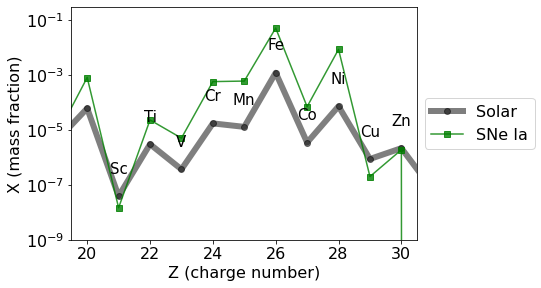

In [3]:
# Set figure
fig = plt.figure(figsize=(8,4))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=6, alpha=0.5, label='Solar')

# Plot contribution from Type Ia supernovae
plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Add element annotations (iron-peak)
Z_low, Z_upp = 20, 30
for i in range(Z_low, Z_upp+1):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=15, ha='center', va='center')
    
# Label, legend, and axis
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(Z_low-0.5, Z_upp+0.5)
plt.ylim(1e-9,3e-1)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

## 2. Neutron-Capture Elements. *s*- and *r*-Process Contributions

In [4]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Number of r-process events per units of stellar mass formed.
# Original value --> 1.0e-6
nb_nsm_per_m = 1.0e-6

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA+
op = omega_plus.omega_plus(nb_nsm_per_m=nb_nsm_per_m, **kwargs)

# Get source contributions
m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
    get_individual_sources(op.inner, i_step_sol=i_t_Sun)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.23s
   OMEGA+ run completed - Run time: 4.47s


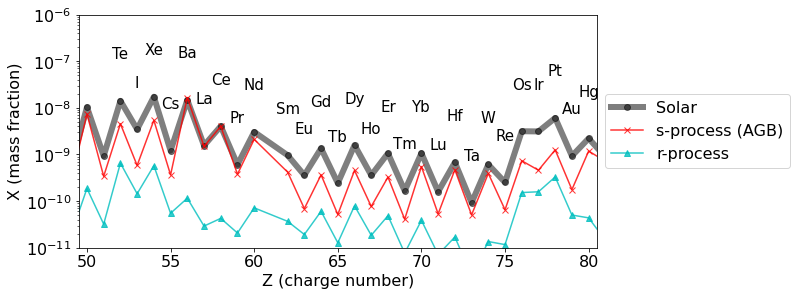

In [5]:
# Set figure
fig = plt.figure(figsize=(12,4))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=6, alpha=0.5, label='Solar')

# Contribution of the s-process (AGB stars)
plt.plot(Z_charge, m_el_agb, color='r', label='s-process (AGB)', alpha=0.8, linestyle='-', marker='x')

# Contribution of the r-process
plt.plot(Z_charge, m_el_nsm, color='c', label='r-process', alpha=0.8, linestyle='-', marker='^')

# Add element annotations (lanthanides)
Z_low, Z_upp = 50, 80
for i in range(Z_low, Z_upp+1):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=15, ha='center', va='center')
    
# Label, legend, and axis
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(Z_low-0.5, Z_upp+0.5)
plt.ylim(1e-11,1e-6)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

## Exercises

* 1) SNe Ia have synthesized most of the Fe we observed today in the Milky Way. How many SNe Ia, per units of stellar mass formed [M$_\odot^{-1}$], are needed in the simulation in order to reproduce the Fe solar abundance? You will need to modify the **nb_1a_per_m** parameter.


* 2) Neutron-capture elements have mostly been synthesized by the slow neutron-capture process (*s*-process) in AGB stars, and by the rapid neutron-capture process (*r*-process) in rare events such as compact binary mergers and exotic classes of supernovae. How many r-process events, per units of stellar mass formed [M$_\odot^{-1}$], are needed in the simulation in order to reproduce the solar abundance of lanthanides (e.g., Eu)? You will need to modify the **nb_nsm_per_m** parameter.


* 3) There are about $5\times10^{10}$ M$_\odot$ of stars in the Milky Way. Using the number you found in Exercises 1) and 2), approximately how many SNe Ia and r-process events have occured within the Milky Way since its formation?

## 3. Extra Material - All sources

In [6]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Number of SNe Ia per units of stellar mass formed.
# For every solar mass of stars formed, there will be statistically nb_1a_per_m SNe Ia.
nb_1a_per_m = 1.0e-4

# Number of r-process events per units of stellar mass formed.
nb_nsm_per_m = 1.0e-6

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA+
op = omega_plus.omega_plus(nb_1a_per_m=nb_1a_per_m, nb_nsm_per_m=nb_nsm_per_m, **kwargs)

# Get source contributions
m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
    get_individual_sources(op.inner, i_step_sol=i_t_Sun)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.16s
   OMEGA+ run completed - Run time: 4.4s


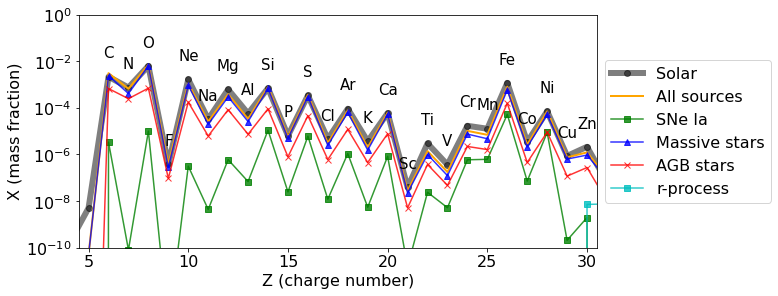

In [7]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Select the range of elements (atomic numbers) you want to plot
Z_low, Z_upp = 5, 30
# NOTE: You might want to modify plt.ylim(..) below.

# ====================================
# ////////// Modify above ////////////

# Set figure
fig = plt.figure(figsize=(12,4.0))
matplotlib.rcParams.update({'font.size': 16.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=6, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Contribution of Type Ia supernovae
plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Contribution of massive stars (core-collapse supernovae)
plt.plot(Z_charge, m_el_massive, color='b', label='Massive stars', alpha=0.8, linestyle='-', marker='^')

# Contribution of AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB stars', alpha=0.8, linestyle='-', marker='x')

# Contribution of the r-process
plt.plot(Z_charge, m_el_nsm, color='c', label='r-process', alpha=0.8, linestyle='-', marker='s')

# Add element annotations (lanthanides)
for i in range(Z_low, Z_upp+1):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=15, ha='center', va='center')
    
# Label, legend, and axis
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(Z_low-0.5, Z_upp+0.5)
plt.ylim(1e-10,1)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)